In [3]:
import pandas as pd
import numpy as np
import plotly as plotly

In [4]:

df_energyco2 = pd.read_csv('../datasets/energyco2_normalizado.csv', delimiter= ";")
df_central_elec = pd.read_csv('../datasets/NORMALIZADO_central_electrica.csv',delimiter= ";")
#df_global_power_plant = pd.read_csv('../datasets/global_power_plant/global_power_plant_database.csv',delimiter= ",")
df_energia_renovable = pd.read_csv('../datasets/energias_renovables/NORMALIZADO_data_energia_renovable.csv',delimiter= ";")
df_energy_consumption = pd.read_csv('../datasets/energy_consumption/owid-energy-consumption-source_normalizado.csv',delimiter=";")
df_paris = pd.read_csv('../datasets/paris_agreement_ndcs/PA_NDCs.csv',delimiter=",")

df_renovables2 = pd.read_csv('../datasets/energias_renovables/NORMALIZADO_data_energia_renovable.csv',delimiter=";")

In [5]:
df = df_energyco2[df_energyco2['Country'] == 'Argentina']
df = df[df['Energy_type']== 'all_energy_types']

df1 = df_energyco2[df_energyco2['Energy_type'] == 'all_energy_types']


In [6]:
df_emisiones2010 = df1[df1['Year'] == 2010]
df_emisiones2010 = df_emisiones2010[['Country','CO2_emission']].reset_index(drop = True)

df_top_2010 = df_emisiones2010.sort_values(by='CO2_emission',ascending=False).head(11)
df_top_2030 = df_top_2010[['Country',"CO2_emission"]]
df_top_2030["CO2_emission_2010"] = df_top_2030["CO2_emission"]
df_top_2030 =df_top_2030.drop("CO2_emission",axis=1)
df_top_2030['CO2_emission_esperado_2030'] = ((df_top_2030["CO2_emission_2010"] - (df_top_2030["CO2_emission_2010"]*45)/100))
df_top_2030['CO2_emission_esperado_2030'] = df_top_2030["CO2_emission_2010"]*0.55
df_top_2030= df_top_2030[df_top_2030['Country'] != 'World']

import plotly.graph_objects as go
import plotly.express as px

fig = px.bar(df_top_2030, x="Country", y='CO2_emission_2010')
fig.update_traces(marker_color='green')
fig2 = px.bar(df_top_2030, x="Country", y='CO2_emission_esperado_2030')
fig2.update_traces(marker_color='black')
go.Figure(fig.data + fig2.data)

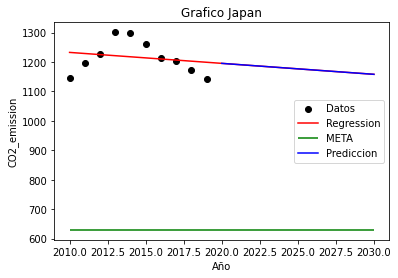

<Figure size 720x720 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

annio = 2010
pais = 'Japan'

df_pred = df1[['Country','Year','CO2_emission']]

df_pred = df_pred[df_pred['Country'] == pais]
df_pred = df_pred[df_pred['Year'] >= annio]

X = df_pred.Year.values.reshape(-1,1)
y = df_pred.CO2_emission.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
y_pred = model.predict(X)

pend = model.coef_[0][0]
orde = model.intercept_[0]

y_pred1 = [((i*pend)+ orde) for i in range(annio,2031)]

anios=[2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]
y_pred = model.predict(np.array(anios).reshape(-1,1))

plt.scatter(X,y,color='black')
plt.xlabel('Año')
plt.ylabel('CO2_emission')

plt.plot(list(range(annio,2031)),y_pred1,color='red')
plt.hlines((df_pred.loc[df_pred['Year'] == 2010, 'CO2_emission'].values * 0.55),annio,2030,color='green')
plt.plot(anios,y_pred,color='blue')

plt.title(f'Grafico {pais}')
plt.legend(['Datos','Regression','META','Prediccion'], loc=7)
plt.figure(figsize=(10,10))
plt.show()


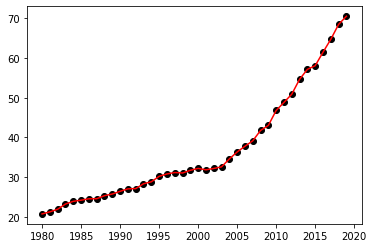

In [8]:
df_renovables = df_energyco2[df_energyco2['Energy_type'] == 'renewables_n_other'] #renewables_n_other renovables
df_renovables = df_renovables[['Country','Year','Energy_consumption','Energy_production']]
df_renovables = df_renovables[df_renovables['Country'] == 'World']

X = df_renovables['Year']
y = df_renovables['Energy_production']
y2 = df_renovables['Energy_consumption']

plt.scatter(X,y,color='black')
plt.plot(X,y,color='red')



In [9]:
df_renovables2

,Unnamed: 0,pais,codigo_iso,anio,valor,info_codigo
0,0,Afghanistan,AFG,1990,39639.42,1.1
1,1,Albania,ALB,1990,80057.64,1.1
2,2,Algeria,DZA,1990,458040.44,1.1
3,3,American Samoa,ASM,1990,306.00,1.1
4,4,Andorra,AND,1990,6670.69,1.1
...,...,...,...,...,...,...
35995,35995,Wallis and Futuna Islands,WLF,2014,0.00,4.1.2
35996,35996,Western Sahara,ESH,2014,NaN,4.1.2
35997,35997,Yemen,YEM,2014,0.00,4.1.2
35998,35998,Zambia,ZMB,2014,14042.00,4.1.2
